# Information driven bars
El propósito de las barras estas barras es muestrear con más frecuencia cuando llega nueva información al mercado. En este contexto, la palabra "información" se utiliza en un sentido microestructural de mercado. Como veremos en el Capítulo 19, las teorías de microestructura de mercado confieren una importancia especial a la persistencia de los volúmenes con signo desequilibrado, ya que este fenómeno está asociado con la presencia de traders informados. Al sincronizar el muestreo con la llegada de traders informados, podemos ser capaces de tomar decisiones antes de que los precios alcancen un nuevo nivel de equilibrio. En esta sección exploraremos cómo utilizar varios índices de llegada de información para muestrear barras.

Las barras de desequilibrio pueden aplicarse a datos de tick, volumen o dólares para producir barras de desequilibrio de tick (TIB), de volumen (VIB) y de dólares (DIB), respectivamente. Las barras de volumen y dólares son simplemente una extensión de las barras de tick, por lo que en este artículo nos centraremos principalmente en las barras de desequilibrio de tick y luego discutiremos brevemente cómo extenderlas para manejar información de volumen o dólares

## Tick imbalance bars

Considere una secuencia de ticks $\{(p_t, v_t)\}_{t=1,\ldots,T}$, donde $(p_t)$ es el precio asociado con el tick $t$ y $v_t$ es el volumen asociado con el tick $t$. La llamada regla del tick define una secuencia ${b_t}_{t=1,\ldots,T}$ donde

$$
b_t = 
\begin{cases} 
b_{t-1} & \text{si } \Delta p_t = 0, \\
\frac{|\Delta p_t|}{\Delta p_t} & \text{si } \Delta p_t \neq 0, 
\end{cases}
$$

con $b_t \in \{-1, 1\}$, y la condición de límite $b_0$ se establece para coincidir con el valor terminal $b_T$ de la barra inmediatamente anterior. La idea detrás de las barras de desequilibrio de tick (TIBs) es muestrear barras siempre que los desequilibrios de tick superen nuestras expectativas. Deseamos determinar el índice de tick, $T$, tal que la acumulación de ticks firmados (según la regla del tick) exceda un umbral dado. A continuación, discutiremos el procedimiento para determinar $T$.

Primero, definimos el desequilibrio de tick en el tiempo $T$ como

$$ \theta_T = \sum_{t=1}^{T} b_t$$

Segundo, calculamos el valor esperado de $\theta_T$ al inicio de la barra, $E_0[\theta_T] = E_0[T](P[b_t = 1] - P[b_t = -1])$, donde $E_0[T]$ es el tamaño esperado de la barra de tick, $P[b_t = 1]$ es la probabilidad incondicional de que un tick se clasifique como compra, y $P[b_t = -1]$ es la probabilidad incondicional de que un tick se clasifique como venta. Dado que $P[b_t = 1] + P[b_t = -1] = 1$, entonces $E_0[\theta_T] = E_0[T](2P[b_t = 1] - 1)$.

En la práctica, podemos estimar $E_0[T]$ como un promedio móvil ponderado exponencialmente de valores $T$ de barras anteriores, y $2P[b_t = 1] - 1$ como un promedio móvil ponderado exponencialmente de valores $b_t$ de barras anteriores.

Tercero, definimos una barra de desequilibrio de tick (TIB) como un subconjunto contiguo de $T^*$ ticks tal que se cumpla la siguiente condición:

$$
T^* = \arg \min_T \left\{  | \theta_T | \geq E_0[\theta_T] \left\|2P[b_t = 1] - 1 \right\| \right\}
$$

donde el tamaño del desequilibrio esperado viene definido por $ |2P[b_t = 1] - 1 |$. Cuando $\theta_T$ supera el desequilibrio esperado, un $T$ bajo satisfará esa condición. Del mismo modo, las TIBs se producen con mayor frecuencia bajo la presencia de trades informados (información asmimétrica que provoca one-side trading). De hecho, podemos entender las barras TIBs como cubos de trades que contienen igual cantidad de información (independientemente del volumen, el precio o cantidad de trades)


## Volume/Dollar Inbalance bars

La idea detrás de las barras de desequilibrio de volumen (VIBs) y las barras de desequilibrio en dólares (DIBs) es extender el concepto de las barras de desequilibrio de ticks (TIBs). Nos gustaría muestrear barras cuando los desequilibrios de volumen o de dólares divergen de nuestras expectativas. Basándonos en las mismas nociones de regla de tick y la condición de límite $b_0$ que discutimos para TIBs, definiremos un procedimiento para determinar el índice de la siguiente muestra, $T$.

Primero, definimos el desequilibrio en el tiempo $T$ como: 
$$ \theta_T = \sum_{t=1}^{T} b_t v_t $$


donde $v_t$ puede representar tanto el número de valores negociados (VIB) como el monto en dólares intercambiado (DIB). La elección de $v_t$ es lo que determina si se está muestreando según el primero o el segundo.

Segundo, calculamos el valor esperado de $\theta_T $ al comienzo de la barra:

$$
E_0[\theta_T] = E_0 \left[ \sum_{t|b_t=1}^{T} v_t \right] - E_0 \left[ \sum_{t|b_t=-1}^{T} v_t \right] = E_0[T] \left( P[b_t = 1]E_0[v_t | b_t = 1] - P[b_t = -1]E_0[v_t | b_t = -1] \right)
$$

Denotemos $v_+ = P[b_t = 1]E_0[v_t | b_t = 1] $, $ v_- = P[b_t = -1]E_0[v_t | b_t = -1] $, de modo que $E_0[T]^{-1} E_0 \left[ \sum_{t} v_t \right] = E_0[v_t] = v_+ + v_-$. Puedes pensar en $v_+$ y $v_-$ como la descomposición de la expectativa inicial de $v_t$ en el componente contribuido por las compras y el componente contribuido por las ventas. Entonces:

$$E_0[\theta_T] = E_0[T](v_+ - v_-) = E_0[T](2v_+ - E_0[v_t])$$

En la práctica, podemos estimar $ E_0[T] $ como un promedio móvil exponencialmente ponderado de los valores $ T $ de barras anteriores, y $ (2v_+ - E_0[v_t]) $ como un promedio móvil exponencialmente ponderado de los valores $ b_t v_t $ de barras anteriores.

Tercero, definimos VIB o DIB como un subconjunto \( T^* \)-contiguo de ticks tal que se cumpla la siguiente condición:

$
T^* = \arg \min_{T} \{|\theta_T| \geq E_0[T]|2v_+ - E_0[v_t]| \}
$

donde el tamaño del desequilibrio esperado está implícito en $ |2v_+ − E_0[v_t]| $. Cuando $ \theta_T $ está más desequilibrado de lo esperado, un $ T $ bajo satisfará estas condiciones. Este es el análogo basado en información de las barras de volumen y de dólares, y al igual que sus predecesores, aborda las mismas preocupaciones con respecto a la fragmentación de ticks y a los valores atípicos. Además, también aborda el problema de las acciones corporativas, porque el procedimiento anterior no depende de un tamaño de barra constante. En cambio, el tamaño de la barra se ajusta dinámicamente.


## The tick rule

En un libro de subastas dobles, se colocan cotizaciones para vender un valor a varios niveles de precios (ofertas) o para comprar un valor a varios niveles de precios (demandas). Los precios de oferta siempre superan los precios de demanda, porque de lo contrario habría una coincidencia instantánea. Se produce una operación siempre que un comprador coincide con una oferta o un vendedor coincide con una demanda. Cada operación tiene un comprador y un vendedor, pero solo un lado inicia la operación.

La regla del tick es un algoritmo utilizado para determinar el lado agresor de una operación. Una operación iniciada por la compra se etiqueta como "1", y una operación iniciada por la venta se etiqueta como "-1", según esta lógica:

$$
b_t =
\begin{cases}
1 & \text{si} \ \Delta p_t > 0 \\
-1 & \text{si} \ \Delta p_t < 0 \\
b_{t-1} & \text{si} \ \Delta p_t = 0
\end{cases}
$$

donde $p_t$ es el precio de la operación indexado por $ 𝑡 = 1,…,𝑇$ y $𝑏_0$ se establece arbitrariamente en 1. Varios estudios han determinado que la regla del tick logra una alta precisión de clasificación, a pesar de su relativa simplicidad (Aitken y Frino [1996]). Los métodos de clasificación competidores incluyen Lee y Ready [1991] y Easley et al. [2016].

Las transformaciones de la serie ${b_t}$ pueden resultar en características informativas. Dichas transformaciones incluyen: (1) Filtros de Kalman en su valor esperado futuro, $𝐸_𝑡[𝑏_{t+1}]$; (2) rupturas estructurales en tales predicciones (Capítulo 17); (3) entropía de la secuencia ${b_t}$ (Capítulo 18); (4) valores $t$ de las pruebas de corridas de Wald-Wolfowitz en ${b_t}$; (5) diferenciación fraccionaria de la serie acumulativa ${b_t}$, $\sum_{i=1}^{t}b_i$
(Capítulo 5); etc.

In [216]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imbalance_bars import ImbalanceBarGenerator

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)


In [2]:
btc_data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\api_data\BTC_all.parquet')
spy_data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\api_data\SPY_all.parquet')

btc_data['date'] = pd.to_datetime(btc_data['date'])
spy_data['date'] = pd.to_datetime(spy_data['date'])

In [3]:
spy_data.head()

,date,open,high,low,close,volume,log_returns,volatility
1,2018-01-02 09:31:00,242.144,242.259,241.731,241.854,472361.0,-0.000413,NaN
2,2018-01-02 09:32:00,242.040,242.286,241.731,241.918,262439.0,0.000265,NaN
3,2018-01-02 09:33:00,242.108,242.223,241.677,241.791,301185.0,-0.000525,NaN
4,2018-01-02 09:34:00,241.977,242.132,241.605,241.719,317255.0,-0.000298,NaN
5,2018-01-02 09:35:00,241.918,242.060,241.587,241.728,259624.0,0.000037,NaN


# Aplicación sobre los datos del SPY

Nota: Los valores faltantes rellenados anteriormente provocan que en los plots, las visualizaciones del desequilibrio acumulado sean penndientes constantes, lo que parece que esta mal; pero es por eso.

<Axes: >

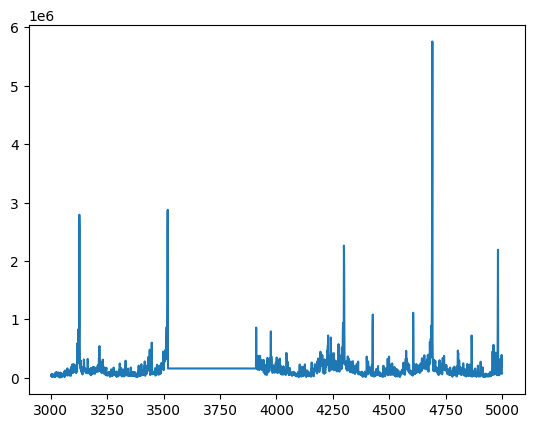

In [5]:
# aqui una muestra de valores faltantes rellenados con la media del volumen. Luego, al sumar ese desequilibrio, 
# la regla re tick hace que todas esas muestras tengan la misma dirección, y al tener el mismo valor, el resultado es una pendiente constante. Nada más.
# Abría que ver si el rellenar valores faltantes de esta manera es una buena práctica o es mejor no hacerlo.
spy_data['volume'][3000:5000].plot()

In [104]:
print(f"Los datos de minuto del SPY contienen {len(spy_data)} muestras")

Los datos de minuto del SPY contienen 662353 muestras


Debido a que la metodología es muy dependiente de los parametros iniciales; los cuales no conocemos para la generación de la primera barra y deben ser definidos, se realiza un barrido con distintos valores para ver cuantas barras se obtienen en función de los parámetros definidos.

In [ ]:
# Inicializar una lista para almacenar los resultados
results = []

# Bucle para generar barras y almacenar los resultados
for ewma_window in range(50, 101, 1):
    for T_init in range(30, 70, 10):  # Ejemplo de rango para T_init
        for imbalance_type in ['volume', 'dollar']:
            spy_generator = ImbalanceBarGenerator(dataframe=spy_data, 
                                                  ewma_window=ewma_window, 
                                                  T_init=T_init,
                                                  imbalance_init=spy_data['volume'].mean())
            
            spy_generator.fit(imbalance_type=imbalance_type)
            barras = spy_generator.get_bars()
            
            # Almacenar los resultados en la lista
            results.append({
                'ewma_window': ewma_window,
                'T_init': T_init,
                'imbalance_type': imbalance_type,
                'bars_length': len(barras)
            })

# Convertir la lista de resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar el DataFrame
results_df


In [272]:
spy_data['volume'].mean()

160617.77614422387

In [206]:
results_df.to_csv('barrido_parametros_imbalance_spy.csv')

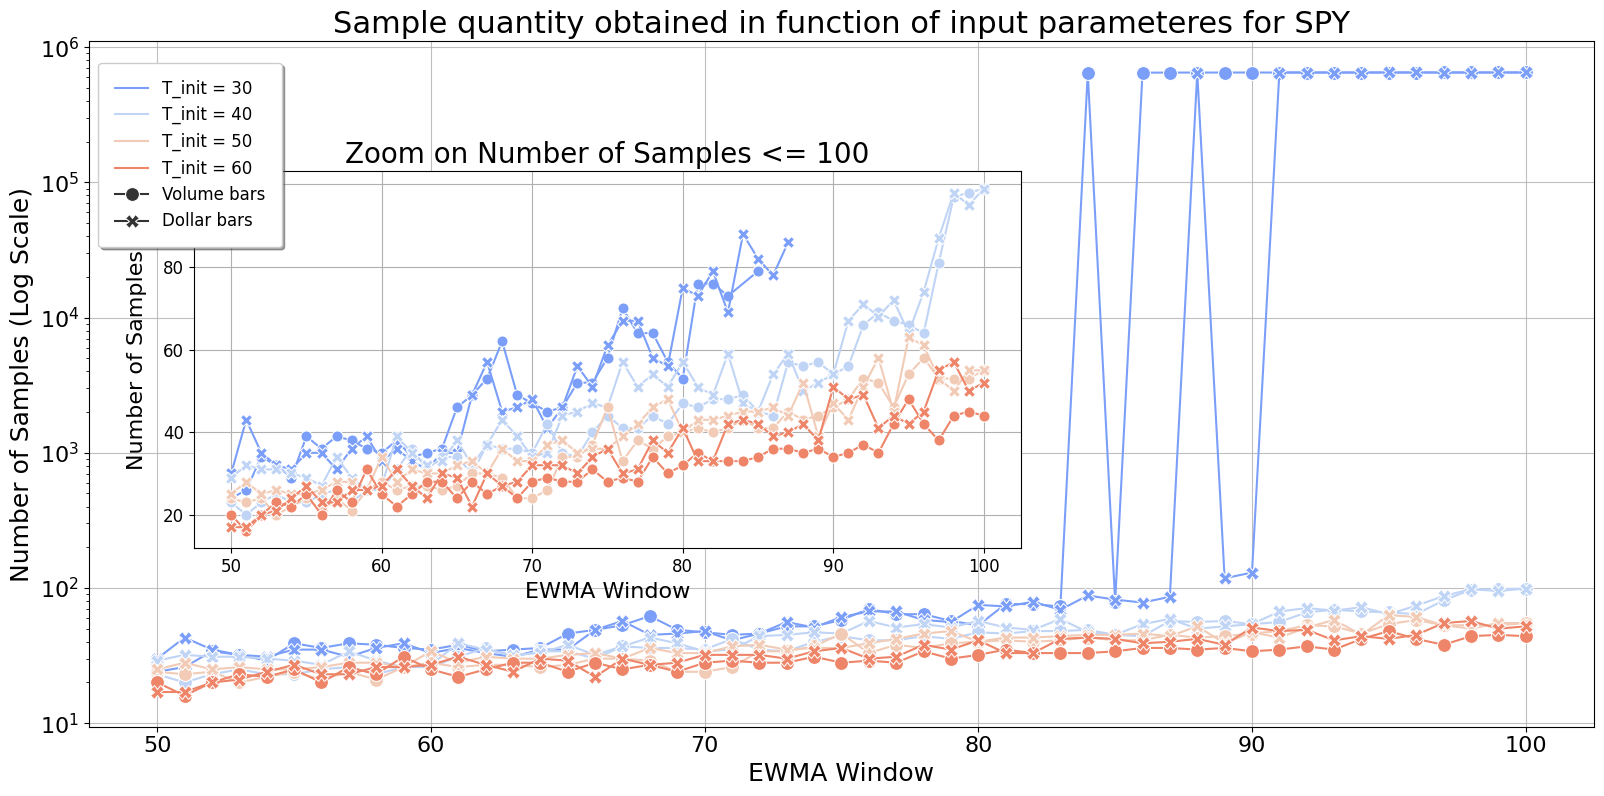

In [246]:
filename = 'barrido_parametros_imbalance_spy'
# Configurar una paleta de colores personalizada
unique_t_inits = results_df['T_init'].unique()
custom_palette = sns.color_palette("coolwarm", len(unique_t_inits))

# Crear el gráfico principal con escala logarítmica
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=results_df,
                  x='ewma_window',
                  y='bars_length',
                  hue='T_init',
                  style='imbalance_type',
                  markers=True,
                  dashes=False,
                  palette=custom_palette,
                  markersize=10)

# Aplicar escala logarítmica al eje Y
ax.set_yscale('log')

# Configurar el título y las etiquetas con la información del activo
plt.title('Sample quantity obtained in function of input parameteres for SPY', fontsize=22)
plt.xlabel('EWMA Window', fontsize=18)
plt.ylabel('Number of Samples (Log Scale)', fontsize=18)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=16)
# Crear el gráfico inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="110%", height="110%", loc='lower left', bbox_to_anchor=(0.065, 0.25, 0.5, 0.5), bbox_transform=ax.transAxes)
small_bars_df = results_df[results_df['bars_length'] <= 100]

# Plotear en el gráfico inset
sns.lineplot(data=small_bars_df,
             x='ewma_window',
             y='bars_length',
             hue='T_init',
             style='imbalance_type',
             markers=True,
             dashes=False,
             ax=ax_inset,
             palette=custom_palette,
             markersize=8)

# Configurar las etiquetas del gráfico inset
ax_inset.set_title('Zoom on Number of Samples <= 100', fontsize=20)
ax_inset.set_xlabel('EWMA Window', fontsize=16)
ax_inset.set_ylabel('Number of Samples', fontsize=16)
ax_inset.grid(True)

# **Eliminar la leyenda del gráfico inset**
ax_inset.get_legend().remove()

# **Modificar las etiquetas de la leyenda**
handles, labels = ax.get_legend_handles_labels()

# Crear nuevas etiquetas personalizadas y asignarlas correctamente
new_labels = []
for label in labels:
    if label.isdigit():
        new_labels.append(f"T_init = {label}")
    elif label == "volume":
        new_labels.append("Volume bars")
    elif label == "dollar":
        new_labels.append("Dollar bars")

# **Reordenar los handles para que coincidan con las nuevas etiquetas**
ordered_handles = []
ordered_labels = []

for t_init in unique_t_inits:
    for i, label in enumerate(labels):
        if label == str(t_init):
            ordered_handles.append(handles[i])
            ordered_labels.append(f"T_init = {label}")
            
for label in ["volume", "dollar"]:
    for i, lbl in enumerate(labels):
        if lbl == label:
            ordered_handles.append(handles[i])
            ordered_labels.append("Volume bars" if label == "volume" else "Dollar bars")

# Aplicar las nuevas etiquetas y mover la leyenda al gráfico inset
ax.legend_.remove()  # Asegurarse de eliminar la leyenda del gráfico principal antes de moverla
ax_inset.legend(handles=ordered_handles, labels=ordered_labels, loc='upper left', bbox_to_anchor=(-0.125,1.31), frameon=True, framealpha=1, shadow=True, borderpad=1, fontsize = 12)

ax.grid(alpha = 0.8)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
# Mostrar el gráfico completo
plt.show()


Pues lo que ya sabíamos, que es una castaña. Elijo parametros inciales para mostrar como las barras explotan en el siguiente gráfico.

In [8]:
T_init = 30
ewma_window = 50
spy_generator = ImbalanceBarGenerator(dataframe=spy_data, 
                                    ewma_window=ewma_window, 
                                    T_init=T_init,
                                    imbalance_init=spy_data['volume'].mean())

spy_generator.fit(imbalance_type='dollar')
barras = spy_generator.get_bars()

In [9]:
#np.unique(spy_generator.dataframe.bt, return_counts=True)

(array([-1.,  1.]), array([305696, 356658], dtype=int64))

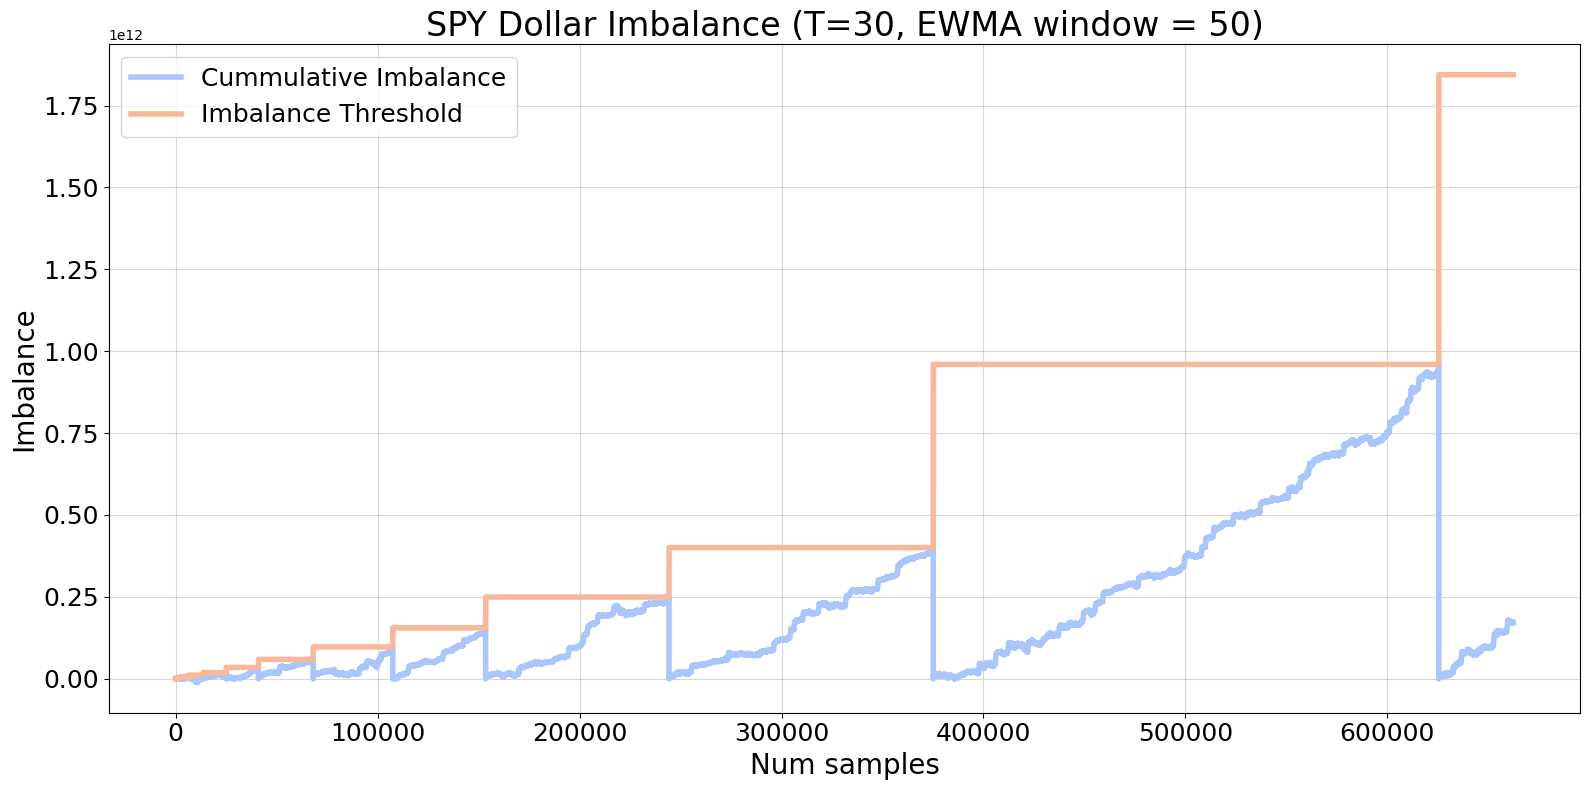

In [10]:
filename = 'spy_volume_explo'

custom_palette = sns.color_palette("coolwarm", 2)

plt.figure(figsize=(16, 8))

sns.lineplot(data=spy_generator.get_series('cum_imbalance'), color=custom_palette[0], label='Cummulative Imbalance', lw=4)
sns.lineplot(data=spy_generator.get_series('expected_imbalance')[:-1], color=custom_palette[1], label='Imbalance Threshold', lw = 4)

plt.ylabel('Imbalance', fontsize=20)
plt.xlabel('Num samples', fontsize=20)

plt.grid(alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plt.legend(fontsize=18)

plt.title(f'SPY Dollar Imbalance (T={T_init}, EWMA window = {ewma_window})', fontsize=24)

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
plt.show()

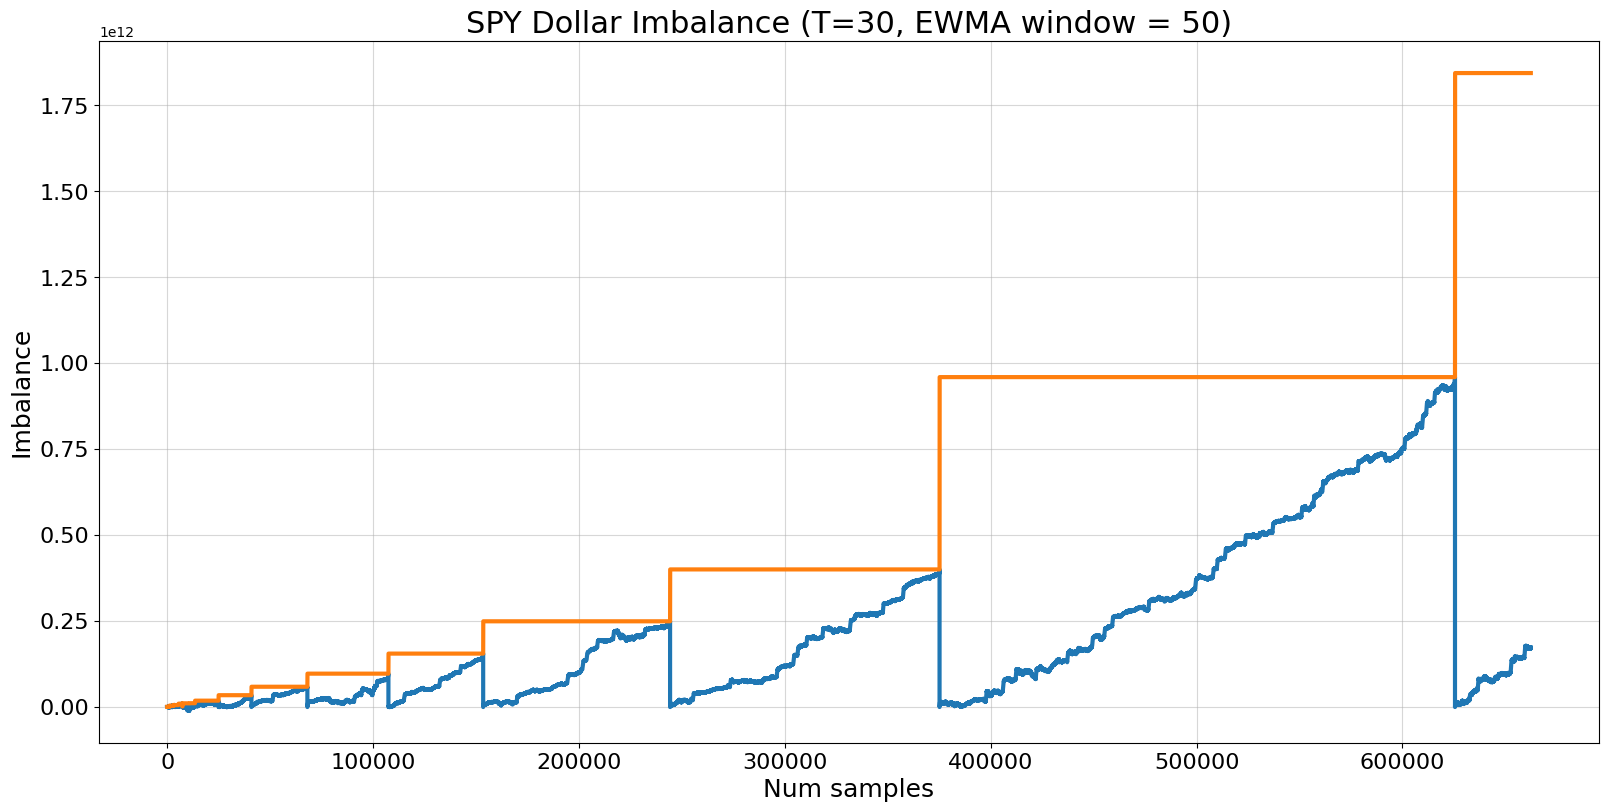

In [11]:
plt.figure(figsize=(16, 8))  
plt.plot(spy_generator.get_series('cum_imbalance'), lw = 3)
plt.plot(spy_generator.get_series('expected_imbalance')[:-1], lw = 3)

plt.ylabel('Imbalance', fontsize=18)
plt.xlabel('Num samples', fontsize=18)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=16)

#plt.plot(-generator.get_series('expected_imbalance')[:])
plt.grid(alpha = 0.5)
plt.title(f'SPY Dollar Imbalance (T={T_init}, EWMA window = {ewma_window})', fontsize = 22)
plt.show()

### Aplicación con umbral



####  Volume SPY

In [179]:
# Realizar el test de Jarque-Bera
jb_stat, p_value = stats.jarque_bera(log_returns)

print(f"JB Statistic: {jb_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución normal.")

JB Statistic: 18160.311106138706
p-value: 0.0
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


In [180]:
p_value

0.0

#### Dollar SPY

In [ ]:
# Inicializar una lista para almacenar los resultados
results_dollar_spy = []

# Bucle para generar barras y almacenar los resultados
for i in range(5,15):
    threshold = i * 10**6 
    #print(i, threshold)

    spy_generator = ImbalanceBarGenerator(dataframe=spy_data, 
                                            ewma_window=10, 
                                            T_init=30,
                                            imbalance_init=spy_data['volume'].mean(),
                                            threshold_value=threshold)
    
    spy_generator.fit(imbalance_type='dollar')
    barras = spy_generator.get_bars()
    

    results_dollar_spy.append({
        'ewma_window': ewma_window,
        'T_init': T_init,
        'threshold':threshold,
        'bars_length': len(barras)
    })

# Convertir la lista de resultados en un DataFrame
results_dollar_spy_df = pd.DataFrame(results_dollar_spy)

In [ ]:
results_dollar_spy_df.to_csv('barrido_threshold_dollar_spy.csv')

In [ ]:
results_dollar_spy_df

In [ ]:
spy_generator_dollar = ImbalanceBarGenerator(dataframe=spy_data, 
                                            ewma_window=10, 
                                            T_init=30,
                                            imbalance_init=spy_data['volume'].mean(),
                                            threshold_value=2*10**9)
    
spy_generator_dollar.fit(imbalance_type='dollar')

In [ ]:
limit1 = 0
limit2 = -1
plt.figure(figsize=(12, 6))  
plt.plot(spy_generator_dollar.get_series('cum_imbalance')[limit1:limit2], lw = 3)
plt.plot(spy_generator_dollar.get_series('expected_imbalance')[limit1:limit2], lw = 3)
plt.plot(-spy_generator_dollar.get_series('expected_imbalance')[limit1:limit2], lw = 3)
plt.ylabel('Imbalance', fontsize=18)
plt.xlabel('Num samples', fontsize=18)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=16)

#plt.plot(-generator.get_series('expected_imbalance')[:])
plt.grid(alpha = 0.5)
plt.title(f'SPY Volume Imbalance (T={T_init}, EWMA window = {ewma_window})', fontsize = 22)
plt.show()

In [ ]:
spy_new_series_dollar = spy_generator_dollar.get_bars()
len(spy_new_series_dollar)

In [ ]:
spy_new_series_dollar

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Configuración de estilo de los gráficos
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

spy_new_series_dollar['log_returns'] = np.log(spy_new_series_dollar['close'] / spy_new_series_dollar['close'].shift(1))
spy_new_series_dollar.dropna(inplace=True)

# Histograma de los log-returns
filename = 'SPY_hist_log_ret_dollar_ldp'
fig, ax = plt.subplots()
log_returns = spy_new_series_dollar['log_returns'].dropna()

# Calcular el histograma y obtener los parámetros
count, bins, ignored = ax.hist(log_returns, bins=50, color='blue', edgecolor='black', alpha=0.7, density=True)

# Ajustar una curva normal a los datos
mu, std = stats.norm.fit(log_returns)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 10000)
p = stats.norm.pdf(x, mu, std)


# Graficar la curva normal ajustada al histograma
ax.plot(x, p, 'r', linewidth=2)

ax.set_title('Histogram of Log Returns - SPY', fontsize=16)
ax.set_xlabel('Log Returns', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_xlim([-0.06, 0.06])

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
plt.show()

In [ ]:
# 1. Autocorrelación de los log-returns
filename = 'SPY_autocorr_log_ret_vol_imb'
fig, ax = plt.subplots()
sm.graphics.tsa.plot_acf(spy_new_series['log_returns'].dropna(), lags=30, ax=ax)

# Configurar colores y estilos
lines = ax.get_lines()
for line in lines:
    line.set_color('blue')
    line.set_alpha(0.7)
    line.set_markerfacecolor('blue')
    line.set_markeredgecolor('blue')

ax.axhline(y=0.2, linestyle='--', color='red', alpha=0.5)
ax.axhline(y=-0.2, linestyle='--', color='red', alpha=0.5)

ax.set_title('Autocorrelation of Log Returns - Vol Imbalance SPY', fontsize=16)
ax.set_xlabel('Lags', fontsize=14)
ax.set_ylabel('Autocorrelation', fontsize=14)

plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
plt.show()

# Aplicación sobre los datos del BTC

In [208]:
print(f"Los datos de minuto del SPY contienen {len(btc_data)} muestras")

Los datos de minuto del SPY contienen 3417119 muestras


In [209]:
# Inicializar una lista para almacenar los resultados
results = []

# Bucle para generar barras y almacenar los resultados
for ewma_window in range(50, 101, 1):
    for T_init in range(30, 70, 10):  # Ejemplo de rango para T_init
        for imbalance_type in ['volume', 'dollar']:
            btc_generator = ImbalanceBarGenerator(dataframe=btc_data, 
                                                  ewma_window=ewma_window, 
                                                  T_init=T_init,
                                                  imbalance_init=btc_data['volume'].mean())
            
            btc_generator.fit(imbalance_type=imbalance_type)
            barras = btc_generator.get_bars()
            
            # Almacenar los resultados en la lista
            results.append({
                'ewma_window': ewma_window,
                'T_init': T_init,
                'imbalance_type': imbalance_type,
                'bars_length': len(barras)
            })

# Convertir la lista de resultados en un DataFrame
results_btc = pd.DataFrame(results)

# Mostrar el DataFrame
results_btc.to_csv('barrido_parametros_imbalance_btc.csv')


In [210]:
results_btc

,ewma_window,T_init,imbalance_type,bars_length
0,50,30,volume,14
1,50,30,dollar,21
2,50,40,volume,14
3,50,40,dollar,10
4,50,50,volume,12
...,...,...,...,...
403,100,40,dollar,32
404,100,50,volume,31
405,100,50,dollar,36
406,100,60,volume,24


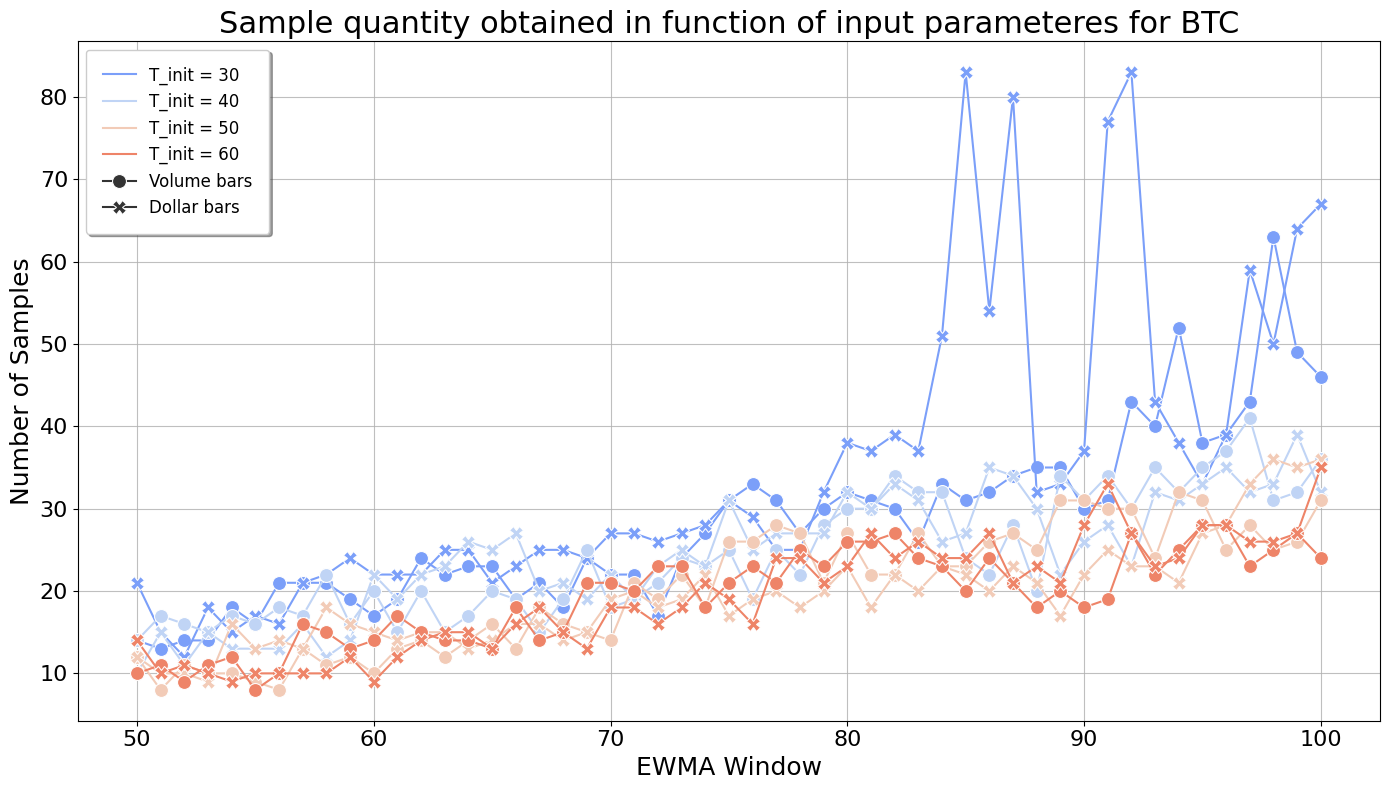

In [242]:
filename = 'barrido_parametros_imbalance_btc'
# Configurar una paleta de colores personalizada
unique_t_inits = results_btc['T_init'].unique()
custom_palette = sns.color_palette("coolwarm", len(unique_t_inits))

# Crear el gráfico principal con escala logarítmica
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=results_btc,
                  x='ewma_window',
                  y='bars_length',
                  hue='T_init',
                  style='imbalance_type',
                  markers=True,
                  dashes=False,
                  palette=custom_palette,
                  markersize=10)

# Aplicar escala logarítmica al eje Y
#ax.set_yscale('log')

# Configurar el título y las etiquetas con la información del activo
plt.title('Sample quantity obtained in function of input parameteres for BTC', fontsize=22)
plt.xlabel('EWMA Window', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)

# Crear el gráfico inset
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# ax_inset = inset_axes(ax, width="110%", height="110%", loc='lower left', bbox_to_anchor=(0.065, 0.27, 0.5, 0.5), bbox_transform=ax.transAxes)
# small_bars_df = results_btc[results_btc['bars_length'] <= 100]

# # Plotear en el gráfico inset
# sns.lineplot(data=small_bars_df,
#              x='ewma_window',
#              y='bars_length',
#              hue='T_init',
#              style='imbalance_type',
#              markers=True,
#              dashes=False,
#              ax=ax_inset,
#              palette=custom_palette,
#              markersize=8)

# # Configurar las etiquetas del gráfico inset
# ax_inset.set_title('Zoom on Number of Samples <= 100', fontsize=12)
# ax_inset.set_xlabel('EWMA Window', fontsize=10)
# ax_inset.set_ylabel('Number of Samples', fontsize=10)
# ax_inset.grid(True)

# # **Eliminar la leyenda del gráfico inset**
# ax_inset.get_legend().remove()

# **Modificar las etiquetas de la leyenda**
handles, labels = ax.get_legend_handles_labels()

# Crear nuevas etiquetas personalizadas y asignarlas correctamente
new_labels = []
for label in labels:
    if label.isdigit():
        new_labels.append(f"T_init = {label}")
    elif label == "volume":
        new_labels.append("Volume bars")
    elif label == "dollar":
        new_labels.append("Dollar bars")

# **Reordenar los handles para que coincidan con las nuevas etiquetas**
ordered_handles = []
ordered_labels = []

for t_init in unique_t_inits:
    for i, label in enumerate(labels):
        if label == str(t_init):
            ordered_handles.append(handles[i])
            ordered_labels.append(f"T_init = {label}")
            
for label in ["volume", "dollar"]:
    for i, lbl in enumerate(labels):
        if lbl == label:
            ordered_handles.append(handles[i])
            ordered_labels.append("Volume bars" if label == "volume" else "Dollar bars")

# Aplicar las nuevas etiquetas y mover la leyenda al gráfico inset
#ax.legend_.remove()  # Asegurarse de eliminar la leyenda del gráfico principal antes de moverla
ax.legend(handles=ordered_handles, labels=ordered_labels, loc='upper left', frameon=True, framealpha=1, shadow=True, borderpad=1, fontsize = 12)

ax.grid(alpha = 0.8)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.savefig('../tfm/figures/' + filename + '.png')
# Mostrar el gráfico completo
plt.show()


recursos: 
+ https://github.com/cltai9145/research/blob/master/Chapter2/2019-04-11_OP_Dollar-Imbalance-Bars.ipynb
+ https://towardsdatascience.com/financial-machine-learning-part-0-bars-745897d4e4ba
+ https://medium.com/@quant_views/imbalance-bars-a860a97838b2
+ https://quant.stackexchange.com/questions/44476/tick-imbalance-bars-advances-in-financial-machine-learning
+ https://github.com/cltai9145/research/blob/master/Chapter2/Getting%20Started.ipynb
+ https://github.com/cltai9145/research/blob/master/Chapter2/2019-04-11_OP_Dollar-Imbalance-Bars.ipynb
+ https://github.com/cltai9145/research/blob/master/Chapter2/mlfinlab/data_structures/fast_ewma.py
+ https://github.com/cltai9145/research/blob/master/Chapter2/2019-03-03_JJ_Sample-Techniques.ipynb
+ https://towardsdatascience.com/information-driven-bars-for-finance-c2b1992da04d
+ https://towardsdatascience.com/information-driven-bars-for-financial-machine-learning-imbalance-bars-dda9233058f0
+ https://www.sefidian.com/2021/06/12/introduction-to-advanced-candlesticks-in-finance-tick-bars-dollar-bars-volume-bars-and-imbalance-bars/
+ https://github.com/quant-views/Imbalance-bars/blob/main/Imbalance-Bars-FINAL.py
+ https://github.com/Harkishan-99/Alternative-Bars/blob/master/bars.py



Question 1. Actually, the assumption of trade data format is that you have timestamp, size and price (not bid/ask) of trade. Sometimes, trades(ticks) are included to Level 1 data (also called BBO) which assumes bid and ask information. However, bars are constructed on trades, not quotes.

Question 2. Yes, T value is derived from equation 3. The process is described in details below.

The whole process of imbalance bars calculation is not straightforward. First of all, you have to set 3 parameters:

Initial guess for expected number of ticks in imbalance bars (𝐸0[𝑇]). When you start to calculate imbalance bars, you don't have any bars at all, so you don't have any information about expected number of ticks inside of an imbalance bar. That is why you need an initial guess. This parameter doesn't significantly impact further imbalance bars, but still it is needed for the first bar calculation

Number of bars to use for expected number of ticks in bars. When you accumulate imbalance bars you can define 𝐸0[𝑇] as EWMA of number of ticks in previous bars that is why you need to set the window for EWMA calculation.

Number of ticks to use for expected imbalance calculation. Expected tick imbalance (2𝑃[𝑏𝑡=1]−1) can be found by calculating EWMA from tick imbalances from previous trades/ticks. We need to set the window for EWMA.

The whole algorithm description:

Set parameters
On each trade calculate cumulative sum of tick imbalances (𝜃𝑇)
Start accumulating ticks until number of tick imbalances reaches the window used to expected tick imbalance calculation.
When number of tick imbalance reaches the EWMA window size - calculate expected tick imbalance (2𝑃[𝑏𝑡=1]−1)
Check if |𝜃𝑇| ≥ 𝐸0[𝑇] * |(2𝑃[𝑏𝑡=1]−1)| (absolute values on left and right)

If True - it means that we have the first bar. Set 𝜃𝑇 to zero, set expected number of ticks(𝐸0[𝑇]) to EWMA of array of number of ticks in previous bars. As we have only one bar available you call EWMA with you window setting on array of generated bars, don't worry you can call EWMA with window = 3 to an array with less than 3 elements.

If False continue, until |𝜃𝑇|≥𝐸0[𝑇]|2𝑃[𝑏𝑡=1]−1|
I am contributor to https://github.com/hudson-and-thames/mlfinlab package where you can see the implementation of imbalance bars (dollar, tick, volume) described above
Question 1: Only tick data works for this method of bar generation, which means you actually need to provide the successful transactions. Bid and ask won't work.

Question 2: T value is generated at each bar and its value will depend on the time it takes to meet the condition in equation (3) given the tick data.

Question 3:* E[T] is calculated using the EWMA of b and the EWMA of T from prior bars. The following code should clarify this procedure:

Keep in mind that at the start you need a guess for the EWMA of b and T, and you need to provide a parameter alpha to compute both of those EWMA.